### Clustering

##### What is clustering?

A clustering is a unsupervise machine learning algorithem, As the name refers to a the data has no labels or a target label.The process of clustering is used to group the data points together based on the similarities or a some conditions on which the data are grouped. In theory, the data are in the same group should have the similar characteristics on the other hand the data in different group have a different characteristics.

Some of the clustering algorithems.
1. Kmeans.
2. Hierarchial clustering.
3. DBSCAN (Density based spartial clustering application of noise)
4. Spartial clustering.

#### Applications of clustering
1. Recommendation engine.
2. Market segmentation.
3. Customer segmentation.
4. Social Network analysis.
5. Seach result grouping.
6. Health care.
7. Manufacturing.
8. Image segmentation.
9. Anomaly Detection.

## K-Means clustering

Kmeans algorithm is an iterative algorithm that tries to partition the dataset into Kpre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. It tries to make the intra-cluster data points as similar as possible while also keeping the clusters as different (far) as possible. It assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid (arithmetic mean of all the data points that belong to that cluster) is at the minimum. The less variation we have within clusters, the more homogeneous (similar) the data points are within the same cluster.

In [24]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [25]:
#Get the data
data=pd.read_csv(r"C:\Users\Praneeth\Downloads\archive\Mall_Customers.csv")

In [26]:
#load the data
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [27]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [29]:
#size of the data
data.shape

(200, 5)

In [30]:
#check any null values
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [31]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

Text(0.5, 1.0, 'Gender')

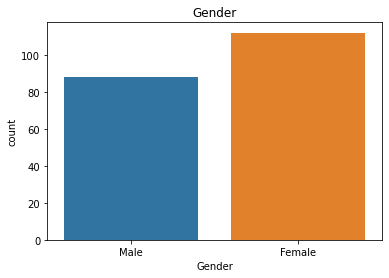

In [33]:
sns.countplot(x='Gender',data=data)
plt.show
plt.title('Gender')

In [34]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [38]:
#check data dtypes
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [47]:
df_1=['Age','Annual Income (k$)','Spending Score (1-100)']
def plot_dist(variable,data):
    g=sns.distplot(data[variable],kde=True,bins=30)
    g.set_title(variable)
    plt.show()
    return g

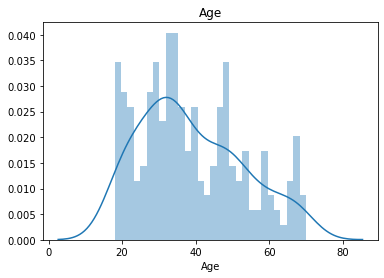

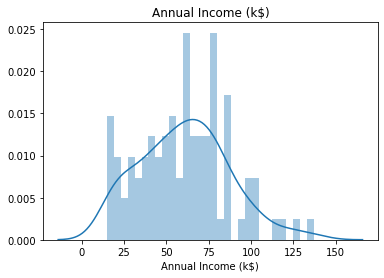

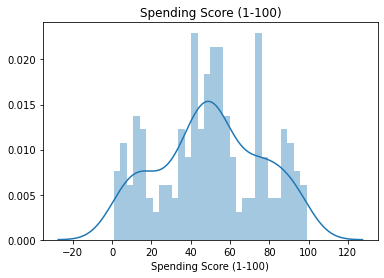

In [48]:
for i in df_1:
    plot_dist(i,data)

In [49]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


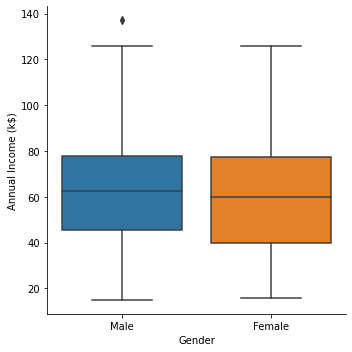

In [52]:
#Check the relation among the variables such as 'Gender','Annual Income'
sns.catplot(x='Gender',y='Annual Income (k$)',data=data,kind='box')
plt.show()

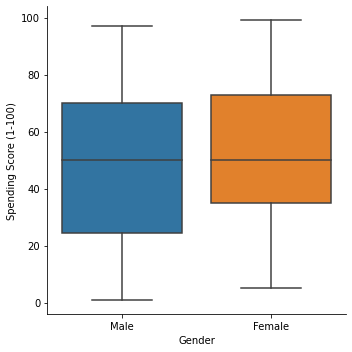

In [58]:
sns.catplot(x='Gender',y='Spending Score (1-100)',data=data,kind='box')

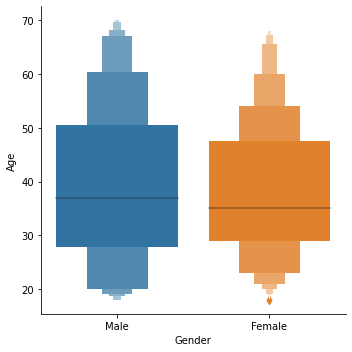

In [54]:
#check the relationship of 'Age','Gender'
sns.catplot(x='Gender',y='Age',data=data,kind='boxen')

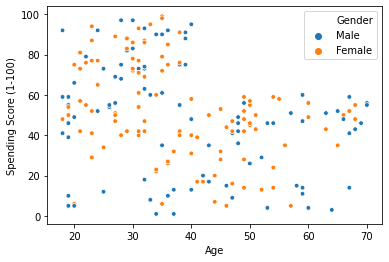

In [57]:
sns.scatterplot(x='Age',y='Spending Score (1-100)',data=data,hue='Gender',s=22)

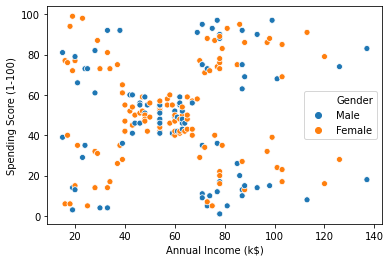

In [59]:
#Visualizing the columns 'Spending score', 'Annual score' using scatterplot
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=data,hue='Gender')

##### Annual income vs Spending score

From the above graph we can see that there are 5 clusters are formed that we can be categorized in to
1. Low Annual income, Low spending score (Bottom left corner)
2. Low Annual income, High Spending score (Top left Corner)
3. High Annual income, Low spending score (Bottom right corner)
4. High Annual income, High Spending score (Top right scorner)
5. Middle Annula income, Middle spending score (Center)

In [61]:
#select the columns 'Annula income','Spending score'
x=data.iloc[:,[3,4]]

In [62]:
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [63]:
### Finding optimal number of clusters using elbow method
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

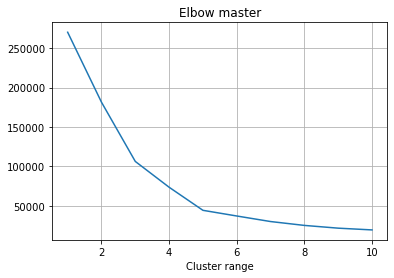

In [68]:
#plot the wcss values
plt.plot(range(1,11),wcss)
plt.title('Elbow master')
plt.xlabel('Cluster range')
plt.grid()
plt.show()

### Feature Scaling

In [69]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

Scaling is performed because, The algorithem such as Kmeans uses Euclidien distance or manhatton distance for finding the nearest points

### Model Building

In [72]:
#Training the kmeans model
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)

In [73]:
y_kmeans=kmeans.fit_predict(x)

In [76]:
y_kmeans

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 4, 1, 4, 2, 4, 2, 4,
       1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4])

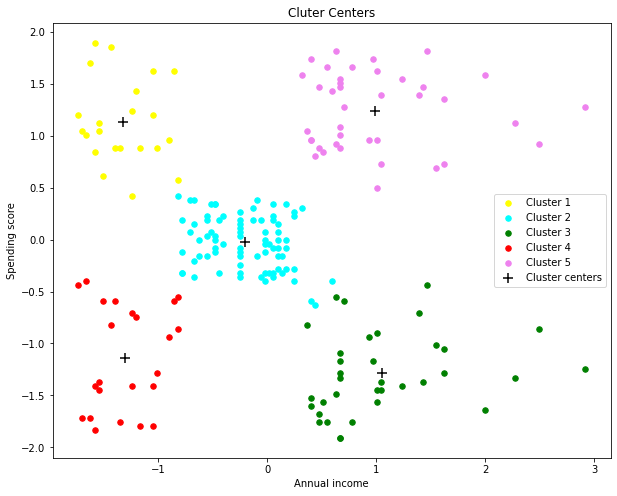

In [82]:
#visualize the clusters
plt.figure(figsize=(10,8))
plt.scatter(x[y_kmeans==0,0],x[y_kmeans ==0,1],s=30,c='yellow',label='Cluster 1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans ==1,1],s=30,c='cyan',label='Cluster 2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans ==2,1],s=30,c='green',label='Cluster 3')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans ==3,1],s=30,c='red',label='Cluster 4')
plt.scatter(x[y_kmeans==4,0],x[y_kmeans ==4,1],s=30,c='violet',label='Cluster 5')
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],s=100,c='black',marker='+',label='Cluster centers')
plt.legend()
plt.title('Cluter Centers')
plt.xlabel('Annual income')
plt.ylabel('Spending score')
plt.show()